Other Real-World Applications of Rayleigh Distribution:
--------------------------------------------------
1. Signal Processing:
   - Amplitude of received radio signals
   - Noise in magnetic resonance imaging

2. Manufacturing:
   - Machine tool vibrations
   - Quality control measurements

3. Medical Imaging:
   - Ultrasound speckle patterns
   - MRI noise distribution


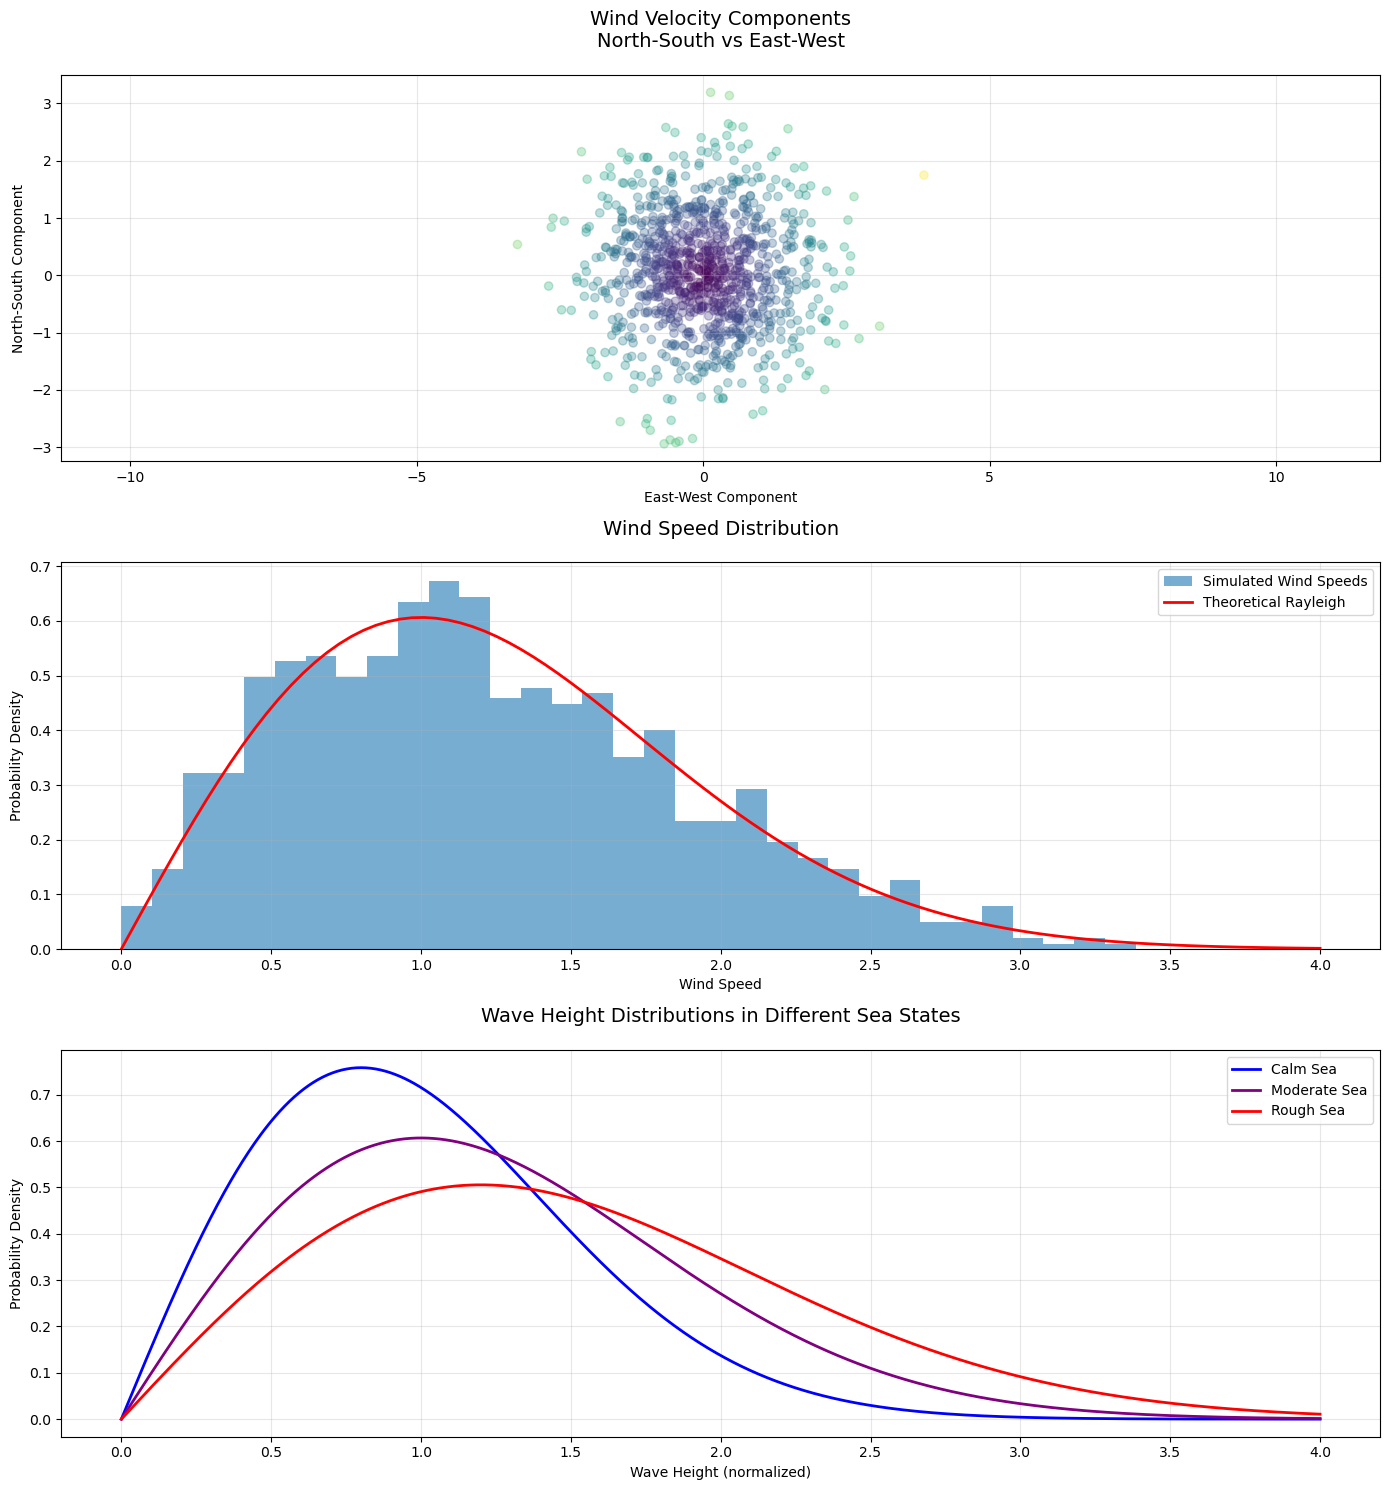

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rayleigh
import seaborn as sns


# Create figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 15))

# Generate random points for wind velocity demonstration
np.random.seed(42)
n_points = 1000
x_wind = np.random.normal(0, 1, n_points)
y_wind = np.random.normal(0, 1, n_points)
wind_speed = np.sqrt(x_wind**2 + y_wind**2)

# Plot 1: Wind Vector Components
ax1.scatter(x_wind, y_wind, alpha=0.3, c=wind_speed, cmap='viridis')
ax1.set_title('Wind Velocity Components\nNorth-South vs East-West', fontsize=14, pad=20)
ax1.set_xlabel('East-West Component')
ax1.set_ylabel('North-South Component')
ax1.axis('equal')
ax1.grid(True, alpha=0.3)

# Plot 2: Wind Speed Distribution
bins = np.linspace(0, 4, 40)
ax2.hist(wind_speed, bins=bins, density=True, alpha=0.6, label='Simulated Wind Speeds')
x = np.linspace(0, 4, 100)
ax2.plot(x, rayleigh.pdf(x, loc=0, scale=1), 'r-', 
         linewidth=2, label='Theoretical Rayleigh')
ax2.set_title('Wind Speed Distribution', fontsize=14, pad=20)
ax2.set_xlabel('Wind Speed')
ax2.set_ylabel('Probability Density')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Other Real-World Examples
x = np.linspace(0, 4, 1000)
scales = [0.8, 1.0, 1.2]
labels = ['Calm Sea', 'Moderate Sea', 'Rough Sea']
colors = ['blue', 'purple', 'red']

for scale, label, color in zip(scales, labels, colors):
    ax3.plot(x, rayleigh.pdf(x, scale=scale), '-', 
             linewidth=2, label=label, color=color)

ax3.set_title('Wave Height Distributions in Different Sea States', 
              fontsize=14, pad=20)
ax3.set_xlabel('Wave Height (normalized)')
ax3.set_ylabel('Probability Density')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()

# Print some interesting statistics
print("Other Real-World Applications of Rayleigh Distribution:")
print("-" * 50)
print("1. Signal Processing:")
print("   - Amplitude of received radio signals")
print("   - Noise in magnetic resonance imaging")
print("\n2. Manufacturing:")
print("   - Machine tool vibrations")
print("   - Quality control measurements")
print("\n3. Medical Imaging:")
print("   - Ultrasound speckle patterns")
print("   - MRI noise distribution")


Mathematical Connection:
--------------------------------------------------
1. Start with two independent normal distributions (X and Y)
2. Calculate distance: R = √(X² + Y²)
3. The distribution of R is Rayleigh

Key Properties:
Mean distance from origin: 1.255 (theoretical: 1.253)
Most common distance (mode): 1.010 (theoretical: 1.000)


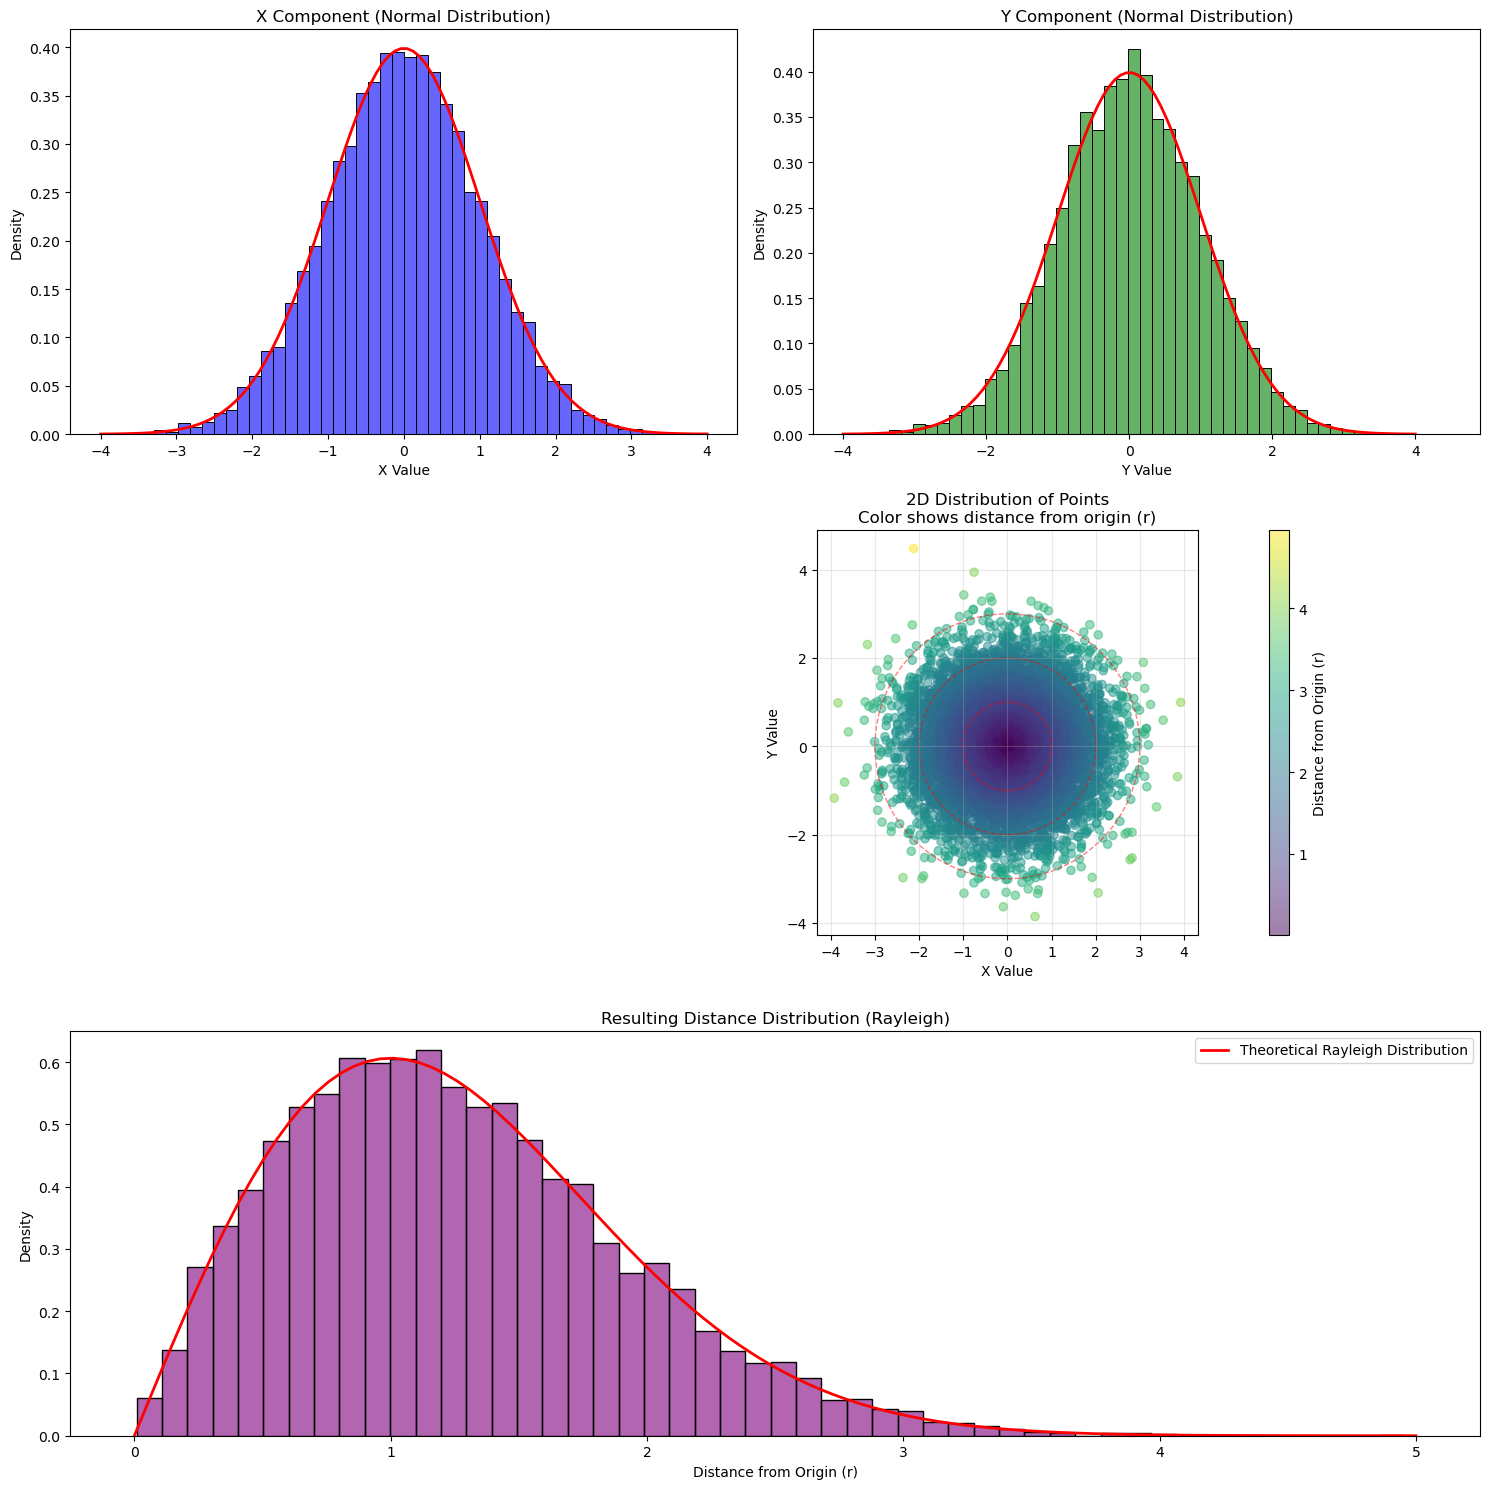

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, rayleigh
import seaborn as sns


# Generate data
np.random.seed(42)
n_points = 10000
x = np.random.normal(0, 1, n_points)
y = np.random.normal(0, 1, n_points)
r = np.sqrt(x**2 + y**2)  # This is our Rayleigh-distributed variable

# Create figure with four subplots
fig = plt.figure(figsize=(15, 15))
gs = fig.add_gridspec(3, 2)

# Plot 1: X distribution (Normal)
ax1 = fig.add_subplot(gs[0, 0])
sns.histplot(x, stat='density', bins=50, alpha=0.6, color='blue', ax=ax1)
x_range = np.linspace(-4, 4, 100)
ax1.plot(x_range, norm.pdf(x_range, 0, 1), 'r-', linewidth=2)
ax1.set_title('X Component (Normal Distribution)', fontsize=12)
ax1.set_xlabel('X Value')
ax1.set_ylabel('Density')

# Plot 2: Y distribution (Normal)
ax2 = fig.add_subplot(gs[0, 1])
sns.histplot(y, stat='density', bins=50, alpha=0.6, color='green', ax=ax2)
ax2.plot(x_range, norm.pdf(x_range, 0, 1), 'r-', linewidth=2)
ax2.set_title('Y Component (Normal Distribution)', fontsize=12)
ax2.set_xlabel('Y Value')
ax2.set_ylabel('Density')

# Plot 3: Scatter plot with distance rings
ax3 = fig.add_subplot(gs[1, :])
scatter = ax3.scatter(x, y, c=r, cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='Distance from Origin (r)')

# Add circles to show distance
for radius in [1, 2, 3]:
    circle = plt.Circle((0, 0), radius, fill=False, linestyle='--', color='red', alpha=0.5)
    ax3.add_artist(circle)

ax3.set_aspect('equal')
ax3.set_title('2D Distribution of Points\nColor shows distance from origin (r)', fontsize=12)
ax3.set_xlabel('X Value')
ax3.set_ylabel('Y Value')
ax3.grid(True, alpha=0.3)

# Plot 4: Resulting Rayleigh distribution
ax4 = fig.add_subplot(gs[2, :])
sns.histplot(r, stat='density', bins=50, alpha=0.6, color='purple', ax=ax4)

# Add theoretical Rayleigh curve
r_range = np.linspace(0, 5, 100)
rayleigh_pdf = r_range * np.exp(-r_range**2/2)
ax4.plot(r_range, rayleigh_pdf, 'r-', linewidth=2, 
         label='Theoretical Rayleigh Distribution')

ax4.set_title('Resulting Distance Distribution (Rayleigh)', fontsize=12)
ax4.set_xlabel('Distance from Origin (r)')
ax4.set_ylabel('Density')
ax4.legend()

plt.tight_layout()

# Print mathematical explanation
print("\nMathematical Connection:")
print("-" * 50)
print("1. Start with two independent normal distributions (X and Y)")
print("2. Calculate distance: R = √(X² + Y²)")
print("3. The distribution of R is Rayleigh")
print("\nKey Properties:")
print(f"Mean distance from origin: {np.mean(r):.3f} (theoretical: {np.sqrt(np.pi/2):.3f})")
print(f"Most common distance (mode): {r_range[np.argmax(rayleigh_pdf)]:.3f} (theoretical: 1.000)")

Why does this happen? Think about it geometrically:

- For any given distance r, we're looking at all points that form a circle
- As r increases, the circle gets bigger (more possible points)
- But the probability of being far from the center decreases exponentially
- These two effects combine to give us the Rayleigh shape


The mathematical formula emerges from this: if $X$ and $Y$ are independent $N(0,1)$, then $R = √(X² + Y²)$ follows the Rayleigh distribution with probability density $f(r) = r * \exp(-r²/2).$